In [1]:
import numpy as np
from scipy.stats import sem
from scipy.constants import R
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
partition_data = 'Partition_data.csv'
sasa_data = 'SASA_Data.csv'


partitions = pd.read_csv(partition_data)
sasa = pd.read_csv(sasa_data)

In [3]:
## Load and divide the partitions data

fragments_array = partitions['Fragment names'].values

#Water
OCT_WAT_array = partitions['OCT-WAT (CG)'].values
OCT_WAT_array_std = partitions['OCT-WAT std. (CG)'].values

OCT_WAT_COSMO     = partitions['OCT-WAT (COSMO)'].values
OCT_WAT_COSMO_std = partitions['OCT-WAT IQR (COSMO)'].values

## HD
HD_WAT_array = partitions['HD-WAT (CG)'].values
HD_WAT_array_std = partitions['HD-WAT std. (CG)'].values

HD_WAT_COSMO = partitions['HD-WAT (COSMO)'].values
HD_WAT_COSMO_std = partitions['HD-WAT IQR (COSMO)'].values


## CLF
CLF_WAT_array = partitions['CLF-WAT (CG)'].values
CLF_WAT_array_std = partitions['CLF-WAT std. (CG)'].values

CLF_WAT_COSMO = partitions['CLF-WAT (COSMO)'].values
CLF_WAT_COSMO_std = partitions['CLF-WAT IQR (COSMO)'].values

In [8]:
HD_WAT_COSMO_std

array([ 8. ,  0.6,  1.1,  1.1,  7.4,  1.7, 12.5,  1.7,  1.1,  1.7,  8.5,
        1.7,  2.3,  2.3,  0.6,  4. ,  5.7,  9.7,  1.1,  1.7,  5.1,  2.3,
        2.8,  1.1,  2.3,  1.7,  2.3])

In [4]:
## Diuvide SASA data
### The order of the fragments between the two data sets is the same

CG_sasa = sasa['CG'].values
CG_sasa_std = sasa['CG std'].values

AA_sasa = sasa['AA'].values
AA_sasa_std = sasa['AA std'].values

## plot SASA

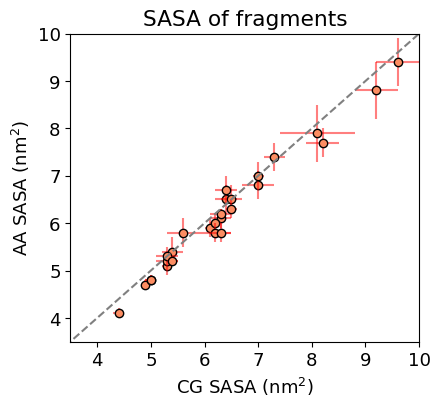

In [5]:
plt.rcParams.update({'font.size': 13})
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec


plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.
plt.rcParams['figure.max_open_warning'] = 50

dot_size = 6

for idx, a in enumerate(AA_sasa):
    plt.errorbar(AA_sasa[idx], CG_sasa[idx], xerr=AA_sasa_std[idx], yerr=CG_sasa_std[idx], ecolor='red', alpha=0.5)
    plt.plot(AA_sasa[idx], CG_sasa[idx], 'o', label=fragments_array[idx], ms=dot_size, color='#fc8d62', mec='black')

x = np.linspace(0, 10000, 100)
# Create the y values, where y = x to draw a perfect diagonal
y = x
# Plot the diagonal line
plt.plot(x, y, linestyle='--', color='grey')

    
plt.ylabel('AA SASA (nm$^2$)' )
plt.xlabel('CG SASA (nm$^2$)')

plt.ylim(3.5,10)
plt.xlim(3.5,10)

plt.xticks([4,5,6,7,8,9,10])
plt.yticks([4,5,6,7,8,9,10])


plt.title('SASA of fragments')

plt.savefig('SASA_fragments.png', dpi=300, bbox_inches='tight',transparent=True)
plt.savefig('SASA_fragments.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Plot partition data

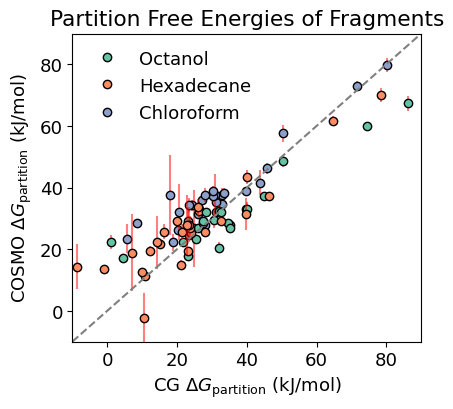

In [26]:
plt.rcParams.update({'font.size': 13})
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

dot_size = 6

plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.
plt.rcParams['figure.max_open_warning'] = 50


for idx, a in enumerate(OCT_WAT_array):
    # Condition to check if it's the last iteration
    if idx == len(OCT_WAT_array) - 1:
        oct_label = 'Octanol'
        hd_label = 'Hexadecane'
        clf_label = 'Chloroform'
    else:
        oct_label = None
        hd_label = None
        clf_label = None

    ## Octanol
    plt.errorbar(OCT_WAT_array[idx], OCT_WAT_COSMO[idx], xerr=OCT_WAT_array_std[idx], yerr=OCT_WAT_COSMO_std[idx], ecolor='red', alpha=0.5)
    plt.plot(OCT_WAT_array[idx], OCT_WAT_COSMO[idx], 'o', label=oct_label, ms=dot_size, color='#66c2a5', mec='black')

    ## Hexadecane
    plt.errorbar(HD_WAT_array[idx], HD_WAT_COSMO[idx], xerr=HD_WAT_array_std[idx], yerr=HD_WAT_COSMO_std[idx], ecolor='red', alpha=0.5)
    plt.plot(HD_WAT_array[idx], HD_WAT_COSMO[idx], 'o', label=hd_label, ms=dot_size, color='#fc8d62', mec='black')

    ## Chloroform
    plt.errorbar(CLF_WAT_array[idx], CLF_WAT_COSMO[idx], xerr=CLF_WAT_array_std[idx], yerr=CLF_WAT_COSMO_std[idx], ecolor='red', alpha=0.5)
    plt.plot(CLF_WAT_array[idx], CLF_WAT_COSMO[idx], 'o', label=clf_label, ms=dot_size, color='#8da0cb', mec='black')    
    
    
plt.ylim(-10,90)
plt.xlim(-10,90)

x = np.linspace(-10, 10000, 100)
# Create the y values, where y = x to draw a perfect diagonal
y = x
# Plot the diagonal line
plt.plot(x, y, linestyle='--', color='grey')

plt.legend(loc='upper left', frameon=False)

    
plt.xlabel(r'CG $\Delta G_{\mathrm{partition}}$ (kJ/mol)')
plt.ylabel(r'COSMO $\Delta G_{\mathrm{partition}}$ (kJ/mol)')

plt.title('Partition Free Energies of Fragments')

plt.savefig('Partitions_fragments.png', dpi=300, bbox_inches='tight',transparent=True)
plt.savefig('Partitions_fragments.pdf', dpi=300, bbox_inches='tight')

plt.show()